In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Exploración de datos: 

In [2]:
raw_data = pd.read_csv('data/pf_suvs_i302_1s2025.csv'); 

In [3]:
raw_data.head()

,Unnamed: 0,Marca,Modelo,Año,Versión,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Precio,Moneda,Descripción,Tipo de vendedor
0,0,Ford,Ecosport,2020.0,1.5 Freestyle 123cv 4x2,Blanco,Nafta,5.0,Manual,1.5,SUV,No,64000.0,Ford Ecosport 1.5 Freestyle 123cv 4x2,20500000.0,$,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria
1,1,Volkswagen,Tiguan,2024.0,LIFE 350 TSI 4M,Negro,Nafta,5.0,Automática secuencial,2.0 L 230 CV 350 TSI,SUV,Sí,0.0,Tiguan Life 350 Tsi 4m Ar,55999900.0,$,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda
2,2,Volkswagen,Tiguan Allspace,2019.0,1.4 Tsi Trendline 150cv Dsg,Negro,Nafta,5.0,Automática,1.4,SUV,NaN,65300.0,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,28300.0,US$,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular
3,3,Ford,Ecosport,2017.0,1.5 Titanium 123Cv 4X2,Blanco,Nafta,5.0,Manual,1.5,SUV,NaN,76898.0,Ford Ecosport 1.5 Titanium 123Cv 4X2,20090000.0,$,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda
4,4,Jeep,Compass,2021.0,2.4 Sport At,NaN,Nafta,5.0,Automática,2.4,SUV,NaN,109000.0,Jeep Compass 2.4 Sport At,23000.0,US$,•Unico dueño•Todos los services oficiales•Bate...,particular


## Detalle de las features del dataset: 

1. **Unnamed: 0**.
    - Numérica
    - Contiene los índices de cada muestra
    - No tiene información, por lo que hay que eliminarla.

2. **Marca**. 
    - Texto
    - Contiene una única palabra que representa la marca de la SUV
    - Se puede hacer one-hot para pasar a una cantidad fija de features binarias.
    - \# nan: 0
    - 47 valores distintos. 

3. **Modelo**.
    - Texto
    - contiene normalmente una palabra que represental e modelo de la SUV
    - 137 valores distintos
    - 0 nan

3. **Año**. 
    - Numérica
    - Outliers mayores a 2025
    - \# nan: 0

4. **Versión**. 
    - Texto de longitud variable
    - Muchas muestras presentan los litros del motor en este campo y no en **Motor**
    - Detalles de la versión del auto
    - Ver una forma de codificar strings de largo variable.
    - \# nan: 0
    - 2072 valores distintos.  

5. **Color**. 
    - Texto
    - Normalmente presenta una palabra pero puede tener más. 
    - Muchas muestras presentan el color en inglés. 
    - Se puede hacer one-hot para pasar a una cantidad fija de features binarias.  O se puede intentar pasar a valor en hex del color para encodearlo. 
    - \# nan: 389
    - 71 valores distintos

6. **Tipo de combustible**. 
    - Texto pero que presenta pocos valores distintos por lo que puede pensarse como categórica.
    - Se pude hacer one-hot para pasar a una cantidad fija de features binarias. 
    - \# nan: 0
    - 8 valores distintos. 

7. **Puertas**. 
    - Numérico.
    - Presenta outliers. 
    - \# nan: 0
    - 7 valores distintos. 

8. **Transimisión**. 
    - Feature categórica en forma de texto
    - 15 nan
    - 5 valores distintos.

9. **Motor**. 
    - Texto
    - No todas las muestras presentan la misma información
    - Una cosa que tiene la mayoría es la cantidad de litros del motor. 
    - Se puede extraer una feature numérica que representa la cantidad de litros del motor. 
    - 38 nan
    - 272 valores distintos. 

10. **Tipo de carrocería**. 
    - Texto
    - Para todas las muestras es 'SUV'
    - 0 nan
    - 1 valor distinto

11. **Con cámara de retroceso**
    - Texto
    - Feature binaria
    - Presenta muchos nan
    - 13563 nan
    - 3 valores distintos

12. **Kilómetros**. 
    - Numérica
    - Hace falta arreglar las comas y puntos en el medio de los números. 

13. **Título**. 
    - Texto
    - Muy similar a **Versión**. 

14. **Precio**. 
    - Numérica
    - Puede estar en pesos o dólares

15. **Moneda**
    - Texto
    - Binaria ('\$' o 'US\$')

16. **Descripción**
    - Texto libre

17. **Tipo de vendedor**
    - Texto
    - Categórica -> se puede hacer one-hot para extraer una cantidad fija de features binarias. 


### 2. Marca

#### Cantidad de autos por marca

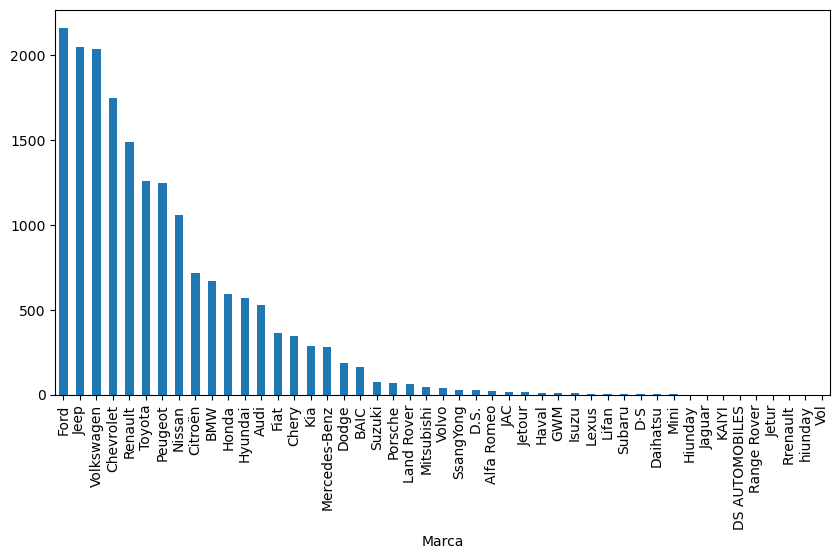

In [4]:
raw_data['Marca'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.show()

Hay marcas mal escritas como 'Vol', 'hiunday' y 'jetur'.

#### Cantidad de nan:

In [5]:
print("La columna \'Marca\' tiene", raw_data['Marca'].isna().sum(), "valores nulos.")

La columna 'Marca' tiene 0 valores nulos.


#### Cantidad de marcas distintas:

In [6]:
print("La columna \'Marca\' tiene", raw_data['Marca'].nunique(), "marcas distintas.")

La columna 'Marca' tiene 47 marcas distintas.


#### Nombres de las marcas presentes en el dataset:

In [7]:
marcas = raw_data['Marca'].unique()
marcas = sorted(marcas, key=lambda x: raw_data['Marca'].value_counts()[x], reverse=True)
for i in range(0, len(marcas), 3):
    print(f"{marcas[i]:<20} {marcas[i+1] if i+1 < len(marcas) else '':<20} {marcas[i+2] if i+2 < len(marcas) else ''}")

Ford                 Jeep                 Volkswagen
Chevrolet            Renault              Toyota
Peugeot              Nissan               Citroën
BMW                  Honda                Hyundai
Audi                 Fiat                 Chery
Kia                  Mercedes-Benz        Dodge
BAIC                 Suzuki               Porsche
Land Rover           Mitsubishi           Volvo
SsangYong            D.S.                 Alfa Romeo
JAC                  Jetour               Haval
GWM                  Isuzu                Lifan
Lexus                Subaru               Daihatsu
D·S                  Mini                 Hiunday
KAIYI                DS AUTOMOBILES       Jaguar
Range Rover          Rrenault             Jetur
hiunday              Vol                  


### 3. Modelo

#### Cantidad de autos por modelo

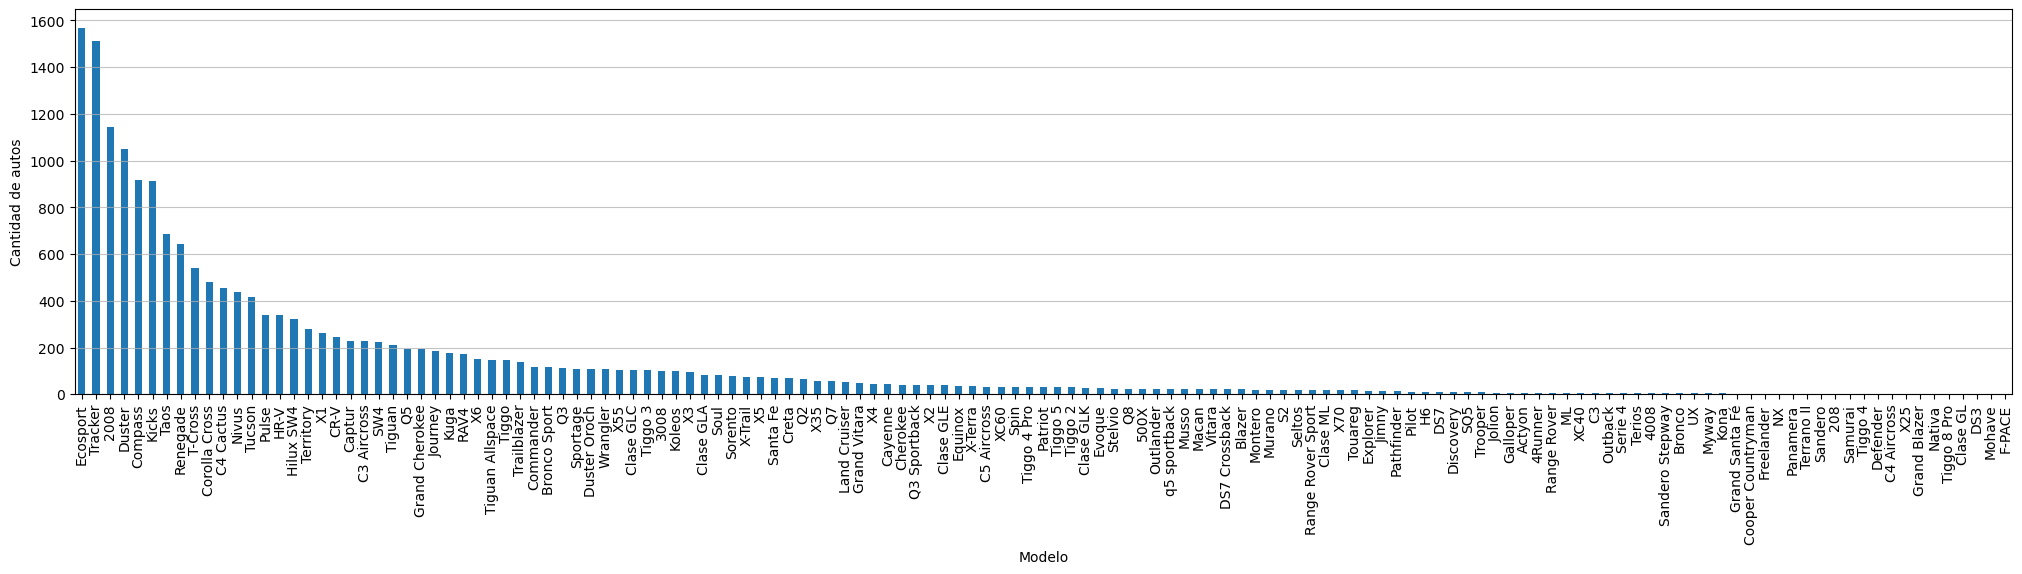

In [8]:
plt.figure(figsize=(25, 5))
raw_data['Modelo'].value_counts().plot(kind='bar', figsize=(25, 5))
plt.xlabel('Modelo')
plt.ylabel('Cantidad de autos')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Cantidad de marcas distintas:

In [9]:
print("La columna \'Modelo\' tiene", raw_data['Modelo'].nunique(), "modelos distintos.")

La columna 'Modelo' tiene 137 modelos distintos.


#### Algunos de los modelos de la columna: 

In [10]:
for i in range(0, 15, 3):
    print(f"{raw_data['Modelo'].unique()[i]:<20} {raw_data['Modelo'].unique()[i+1] if i+1 < len(raw_data['Modelo'].unique()) else '':<20} {raw_data['Modelo'].unique()[i+2] if i+2 < len(raw_data['Modelo'].unique()) else ''}")

Ecosport             Tiguan               Tiguan Allspace
Compass              X55                  Sorento
Tucson               Cayenne              Renegade
2008                 Pulse                Tracker
C4 Cactus            Wrangler             X1


#### Cantidad de nan: 

In [11]:
print("La columna \'Año\' tiene", raw_data['Año'].isna().sum(), "valores nulos.")

La columna 'Año' tiene 0 valores nulos.


### 4. Año

#### Histograma de los valores ingresados para la columna **Años**

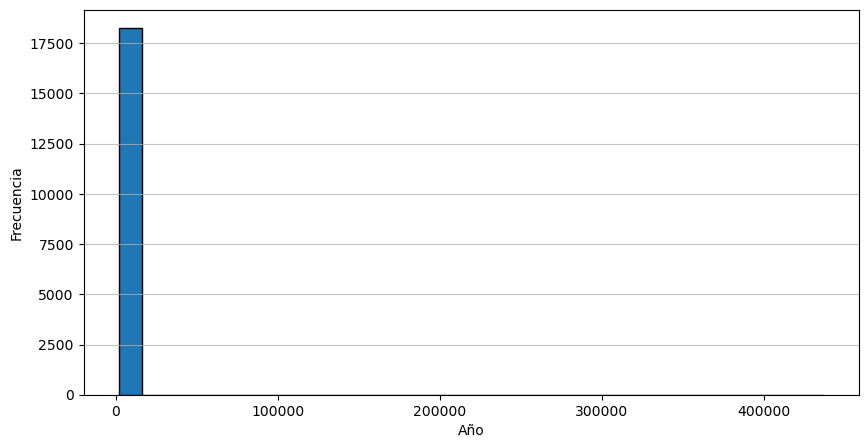

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(raw_data['Año'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Cantidad de autos por año

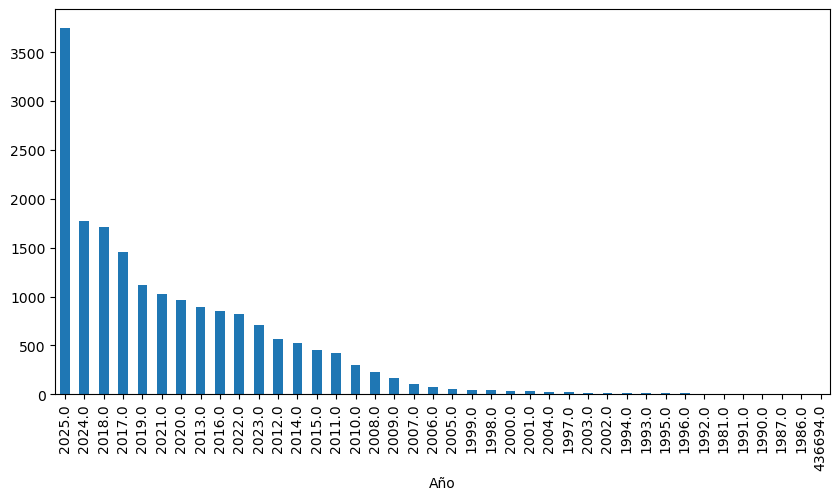

In [13]:
raw_data['Año'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.show()

Omitimos el outlier (mayor a 2025) para ver la distribución de la feature:

#### Histograma de los valores ingresados para la columna **Año** omitiendo los valores mayores a 2025. 

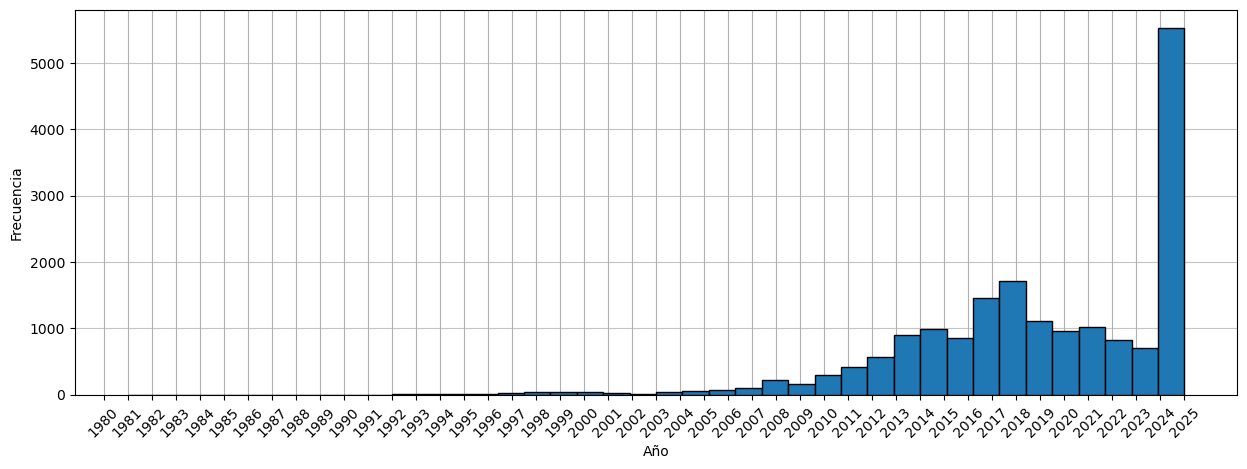

In [55]:
plt.figure(figsize=(15, 5))
raw_data[raw_data['Año'] <= 2025]['Año'].hist(bins=40, edgecolor='black', zorder=10)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(1980, 2026), rotation=45)
plt.show()

#### Cantidad de nan: 

In [56]:
print("La columna \'Año\' tiene", raw_data['Año'].isna().sum(), "valores nulos.")

La columna 'Año' tiene 0 valores nulos.


#### Cantidad de muestras por año:

In [58]:
años = raw_data['Año'].value_counts().sort_index()
for i in range(0, len(años), 3):
    print(f"{años.index[i]:<10} {años.values[i]:<10} {años.index[i+1] if i+1 < len(años) else '':<10} {años.values[i+1] if i+1 < len(años) else '':<10} {años.index[i+2] if i+2 < len(años) else '':<10} {años.values[i+2] if i+2 < len(años) else ''}")

1981.0     3          1986.0     1          1987.0     1
1990.0     2          1991.0     2          1992.0     4
1993.0     11         1994.0     12         1995.0     11
1996.0     8          1997.0     25         1998.0     40
1999.0     45         2000.0     37         2001.0     28
2002.0     13         2003.0     16         2004.0     26
2005.0     55         2006.0     76         2007.0     108
2008.0     226        2009.0     165        2010.0     302
2011.0     421        2012.0     561        2013.0     893
2014.0     529        2015.0     455        2016.0     853
2017.0     1453       2018.0     1710       2019.0     1117
2020.0     961        2021.0     1022       2022.0     826
2023.0     711        2024.0     1770       2025.0     3754
436694.0   1                                           


### 5. Versión

#### Cantidad de valores distintos para la columna **Versión**

In [16]:
print("La columna \'Versión\' tiene", len(raw_data['Versión'].unique()), "valores distintos.")

La columna 'Versión' tiene 2072 valores distintos.


#### Cantidad de valores nulos

In [17]:
print("La columna \'Versión\' tiene", raw_data['Versión'].isna().sum(), "valores nulos.")

La columna 'Versión' tiene 0 valores nulos.


### 6. Color

#### Cantidad de autos por color:

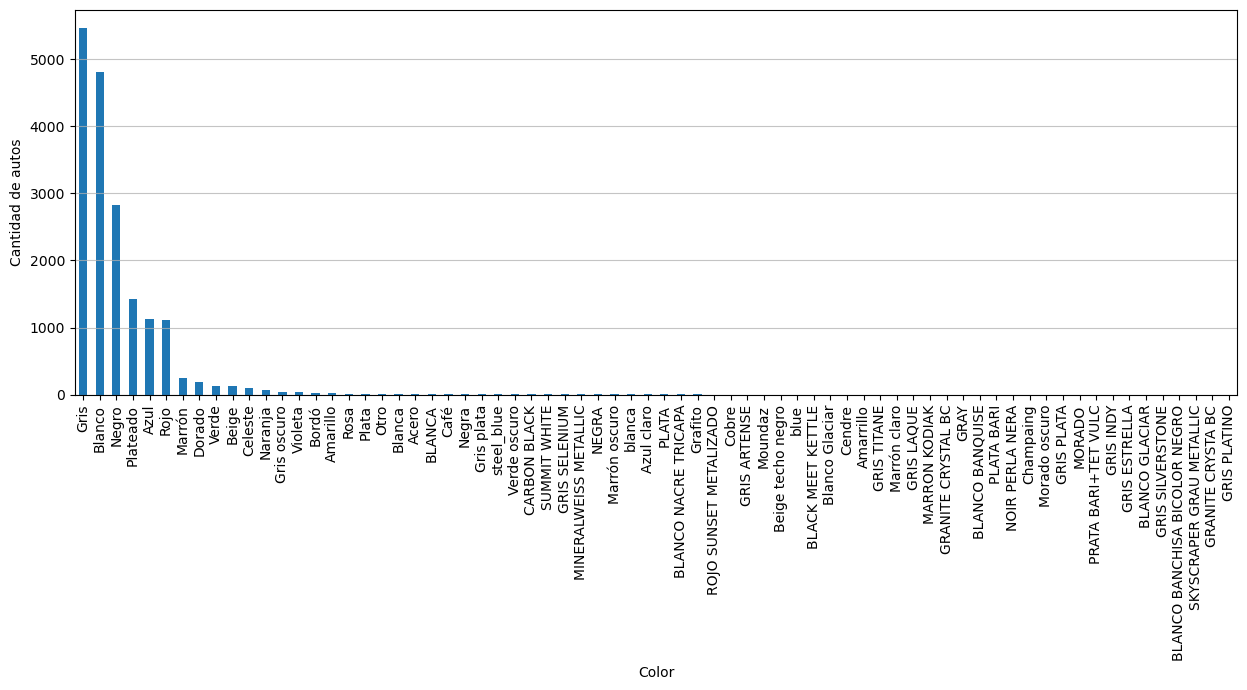

In [78]:
# plotear la cantidad de autos por color
raw_data['Color'].value_counts().plot(kind='bar', figsize=(15, 5))
plt.xlabel('Color')
plt.ylabel('Cantidad de autos')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Cantidad de colores distintos:

In [19]:
print("La columna \'Color\' tiene", len(raw_data['Color'].unique()), "colores distintos.")

La columna 'Color' tiene 71 colores distintos.


#### Cantidad de nan:

In [20]:
print("La columna \'Color\' tiene", raw_data['Color'].isna().sum(), "valores nulos.")

La columna 'Color' tiene 389 valores nulos.


#### Algunos colores de la columna

In [21]:
for i in range(0, 33, 3):
    print(f"{raw_data['Color'].unique()[i]:<20} {raw_data['Color'].unique()[i+1] if i+1 < len(raw_data['Color'].unique()) else '':<20} {raw_data['Color'].unique()[i+2] if i+2 < len(raw_data['Color'].unique()) else ''}")

Blanco               Negro                nan
Rojo                 Gris                 Plateado
Azul                 Violeta              Beige
BLANCA               Naranja              Verde
Dorado               Marrón               Celeste
Otro                 Café                 Beige techo negro
steel_blue           Moundaz              Amarillo
Plata                GRIS SELENIUM        GRIS ARTENSE
Gris oscuro          Negra                Blanca
Bordó                Grafito              Cobre
Rosa                 SUMMIT WHITE         NEGRA


### 7. Tipo de combustible

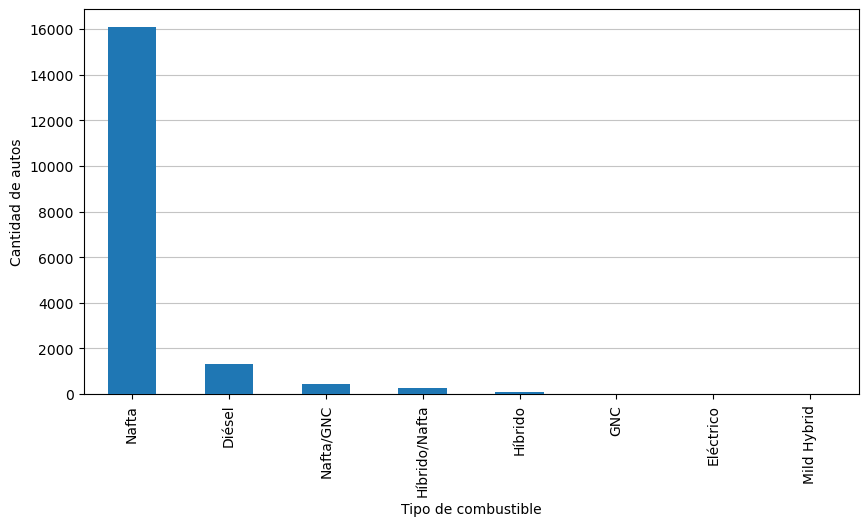

In [22]:
raw_data['Tipo de combustible'].value_counts().plot(kind='bar', figsize=(10, 5), zorder=10)
plt.xlabel('Tipo de combustible')
plt.ylabel('Cantidad de autos')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Cantidad de tipos distintos de combustible

In [23]:
print("La columna \'Tipos de combustible\' tiene", len(raw_data['Tipo de combustible'].unique()), "tipos distintos.")

La columna 'Tipos de combustible' tiene 8 tipos distintos.


#### Distintos valores para la columna **Tipo de combustible**

In [24]:
for tipo in raw_data['Tipo de combustible'].unique():
    print(f"{tipo:<20} {raw_data['Tipo de combustible'].value_counts()[tipo]}")

Nafta                16067
Nafta/GNC            451
Diésel               1328
Híbrido              105
Híbrido/Nafta        269
GNC                  12
Eléctrico            12
Mild Hybrid          10


#### Cantidad de valores nulos:

In [25]:
print("La columna \'Tipo de combustible\' tiene", raw_data['Tipo de combustible'].isna().sum(), "valores nulos.")

La columna 'Tipo de combustible' tiene 0 valores nulos.


### 8. Puertas

#### Cantidad de muestras para cada cantidad de muestras del dataset

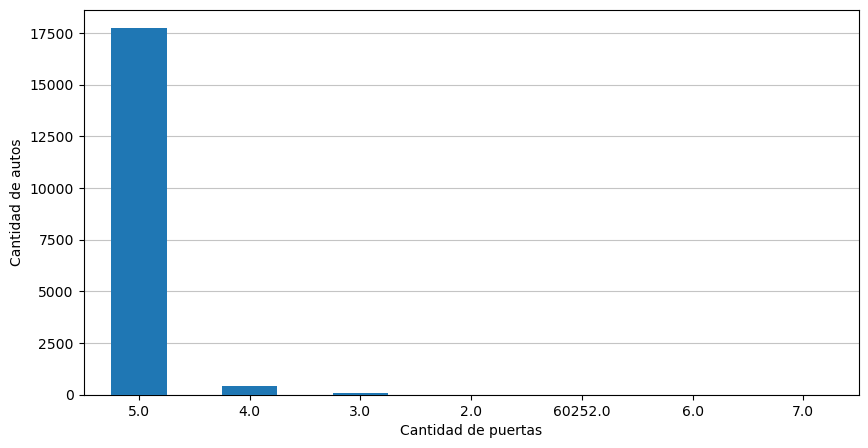

In [26]:
raw_data['Puertas'].value_counts().plot(kind='bar', figsize=(10, 5), zorder=10)
plt.xlabel('Cantidad de puertas')
plt.ylabel('Cantidad de autos')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Histograma de la distribución de la cantidad de muestras omitiendo los outliers: 

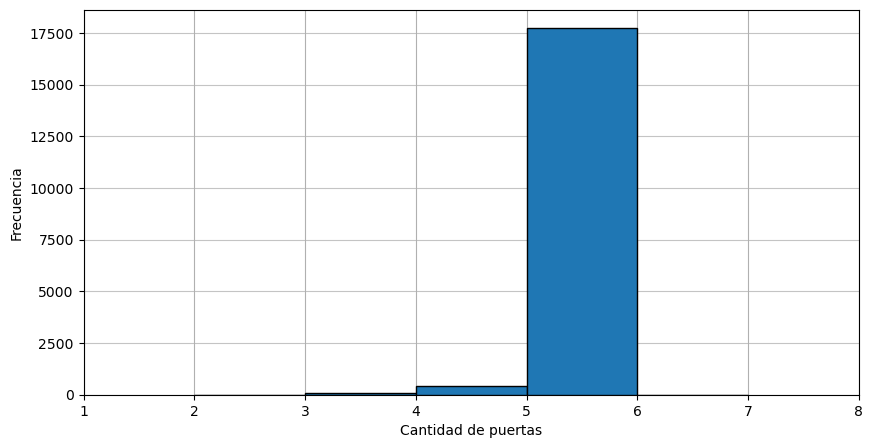

In [27]:
plt.figure(figsize=(10, 5))
raw_data[raw_data['Puertas'] < 8]['Puertas'].hist(bins=5, edgecolor='black', zorder=10)
plt.xlabel('Cantidad de puertas')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(1, 9))
plt.show()

#### Valores distintos en la feature **Puertas**

In [28]:
print("La columna \'Puertas\' tiene", len(raw_data['Puertas'].unique()), "valores distintos.")

La columna 'Puertas' tiene 7 valores distintos.


#### Valores en la columna con su count

In [29]:
for c_puerta in raw_data['Puertas'].unique():
    print(f"{c_puerta:<20} {raw_data['Puertas'].value_counts()[c_puerta]}")

5.0                  17731
3.0                  105
4.0                  399
6.0                  3
60252.0              4
2.0                  10
7.0                  2


#### Cantidad de nan: 

In [30]:
print("La columna \'Puertas\' tiene", raw_data['Puertas'].isna().sum(), "valores nulos.")

La columna 'Puertas' tiene 0 valores nulos.


### 9. Transmisión

#### Cantidad de muestras para cada valor de transmisión: 

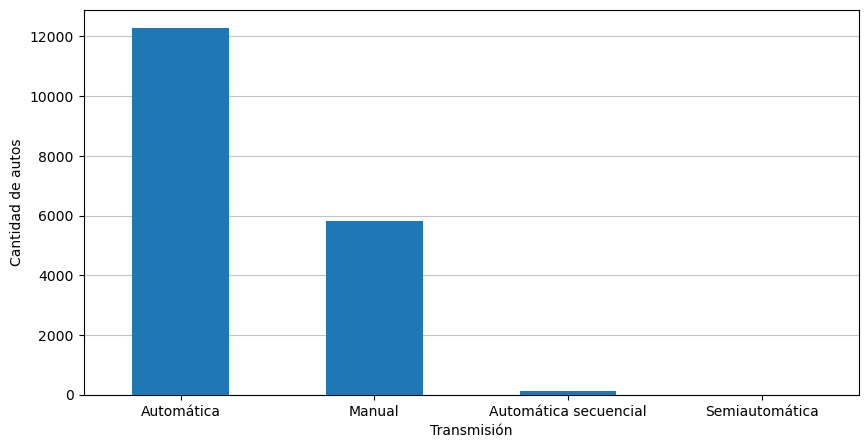

In [31]:
raw_data['Transmisión'].value_counts().plot(kind='bar', figsize=(10, 5), zorder=10)
plt.xlabel('Transmisión')
plt.ylabel('Cantidad de autos')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Cantidad de valores distintos

In [32]:
print("La columna \'Transimisión\' tiene", len(raw_data['Transmisión'].unique()), "valores distintos.")

La columna 'Transimisión' tiene 5 valores distintos.


#### Cantidad de valores nulos para la columna **Transmisión**

In [33]:
print("La columna \'Transmisión\' tiene", raw_data['Transmisión'].isna().sum(), "valores nulos.")

La columna 'Transmisión' tiene 15 valores nulos.


### 10. Motor

#### Cantidad de valores distintos 

In [34]:
print("La columna \'Motor\' tiene", len(raw_data['Motor'].unique()), "valores distintos.")

La columna 'Motor' tiene 272 valores distintos.


#### Cantidad de valores faltantes

In [35]:
print("La columna \'Motor\' tiene", raw_data['Motor'].isna().sum(), "valores nulos.")

La columna 'Motor' tiene 38 valores nulos.


### 11. Tipo de carrocería

#### Cantidad de valores distintos

In [36]:
print("La columna \'Tipo de carrocería\' tiene", len(raw_data['Tipo de carrocería'].unique()), "valores distintos.")

La columna 'Tipo de carrocería' tiene 1 valores distintos.


#### Cantidad de nan: 

In [37]:
print("La columna \'Tipo de carroceŕia\' tiene", raw_data['Tipo de carrocería'].isna().sum(), "valores nulos.")

La columna 'Tipo de carroceŕia' tiene 0 valores nulos.


### 12. Con cámara de retroceso

#### Cantidad de valores distintos

In [38]:
print("La columna \'Con camara de retroceso\' tiene", len(raw_data['Con cámara de retroceso'].unique()), "valores distintos.")

La columna 'Con camara de retroceso' tiene 3 valores distintos.


#### Cantidad de valores nulos

In [39]:
print("La columna \'Con cámara de retroceso\' tiene", raw_data['Con cámara de retroceso'].isna().sum(), "valores nulos.")

La columna 'Con cámara de retroceso' tiene 13563 valores nulos.


#### Cantidad de muestras para cada valor de la columna **Con cámara de retroceso**

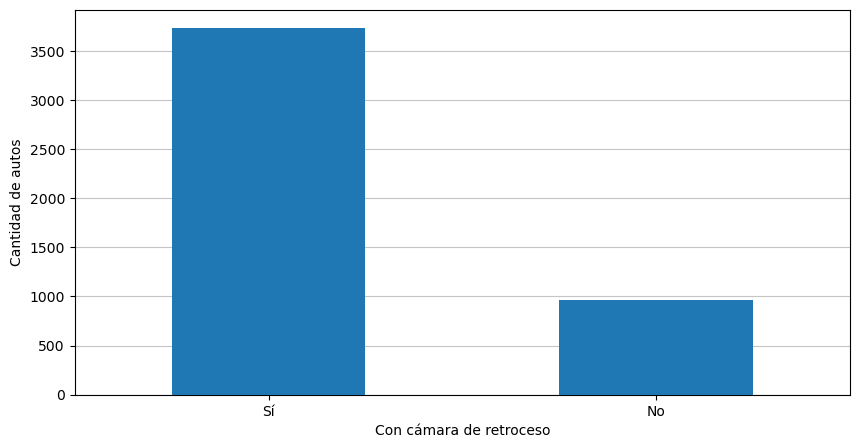

In [ ]:
raw_data['Con cámara de retroceso'].value_counts().plot(kind='bar', figsize=(10, 5), zorder=10)
plt.xlabel('Con cámara de retroceso')
plt.ylabel('Cantidad de autos')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

### 13. Kilómetros

In [ ]:
def clean_km_value(value:str) -> float:
    """Limpia un valor individual de kilómetros"""
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    if value_str.endswith(' km'):
        value_str = value_str[:-3].strip()
    if value_str.endswith('km'):
        value_str = value_str[:-2].strip()
    
    if '.' in value_str:
        parts = value_str.split('.')
        if len(parts) == 2:
            if parts[1] == '0':
                return float(parts[0])
            elif len(parts[1]) == 3 and parts[1].isdigit():
                return float(parts[0] + parts[1])
            else:
                return float(value_str)
    
    return float(value_str)
    # try:
        # return float(value_str)
    # except ValueError:
        # return np.nan

clean_km = raw_data['Kilómetros'].apply(clean_km_value)

#### Histograma de la columna **Kilómetros** limpia

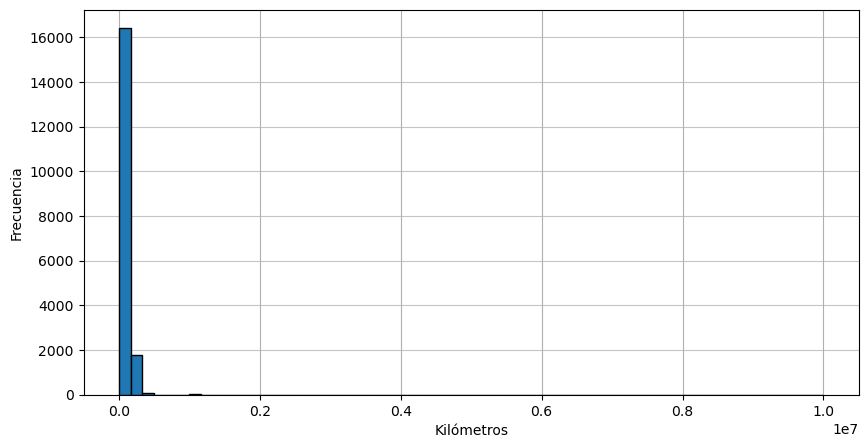

In [60]:
plt.figure(figsize=(10, 5))
clean_km.hist(bins=60, edgecolor='black', zorder=10)
plt.xlabel('Kilómetros')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Distintos valores para la columna **Kilómetros**

In [43]:
print("La columna \'Kilómetros\' tiene", len(clean_km.unique()), "valores distintos.")

La columna 'Kilómetros' tiene 2126 valores distintos.


#### Cantidad de valores nulos

In [ ]:
print("La columna \'Kilómetros\' tiene", clean_km.isna().sum(), "valores nulos.")

La columns 'Kilómetros' tiene 0 valores nulos.


In [68]:
clean_km.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 0.999, 0.9999, 0.99999])

count      1.825400e+04
mean       7.538505e+04
std        1.061987e+05
min        0.000000e+00
1%         0.000000e+00
5%         0.000000e+00
25%        5.000000e+02
50%        6.800000e+04
75%        1.160000e+05
95%        2.000000e+05
99%        2.920000e+05
99.9%      5.204580e+05
99.99%     1.213990e+06
99.999%    8.485000e+06
max        9.999999e+06
Name: Kilómetros, dtype: float64

In [64]:
print(1e5)

100000.0


### 14. Título

### 15. Precio

In [45]:
precio_dolar = 1150
mask = raw_data['Moneda'] == '$'
clean_price = raw_data.loc[mask, 'Precio'] / precio_dolar

#### Distribución del precio

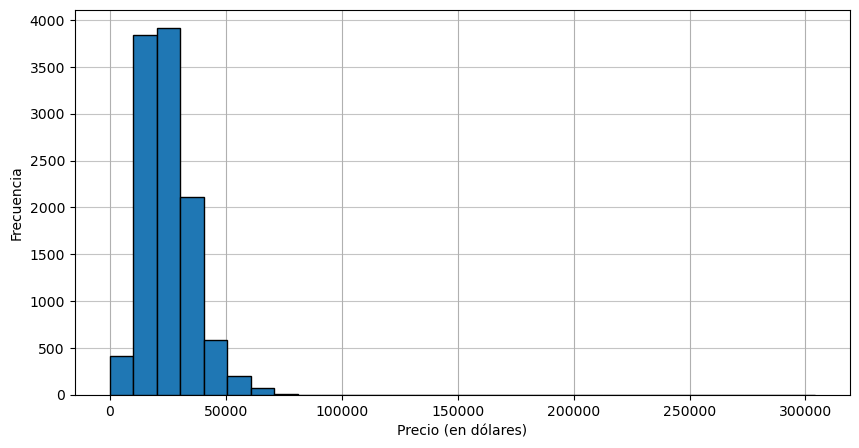

In [46]:
plt.figure(figsize=(10, 5))
clean_price.hist(bins=30, edgecolor='black', zorder=10)
plt.xlabel('Precio (en dólares)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Log distribución del precio

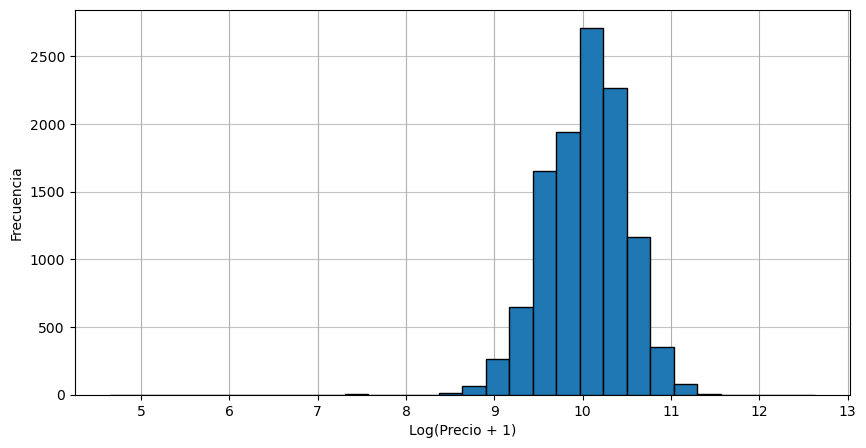

In [47]:
# Log de la distribución del precio
plt.figure(figsize=(10, 5))
np.log(clean_price + 1).hist(bins=30, edgecolor='black', zorder=10)
plt.xlabel('Log(Precio + 1)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [48]:
clean_price.describe()

count     11158.000000
mean      25021.400461
std       11111.835937
min         103.478261
25%       16521.739130
50%       23756.521739
75%       31217.391304
max      303913.043478
Name: Precio, dtype: float64

#### Cantidad de valores nulos

In [49]:
print("La columna \'Precio\' tiene", clean_price.isna().sum(), "valores nulos.")

La columna 'Precio' tiene 0 valores nulos.


### 16. Moneda

#### Cantidad de muestras por valor

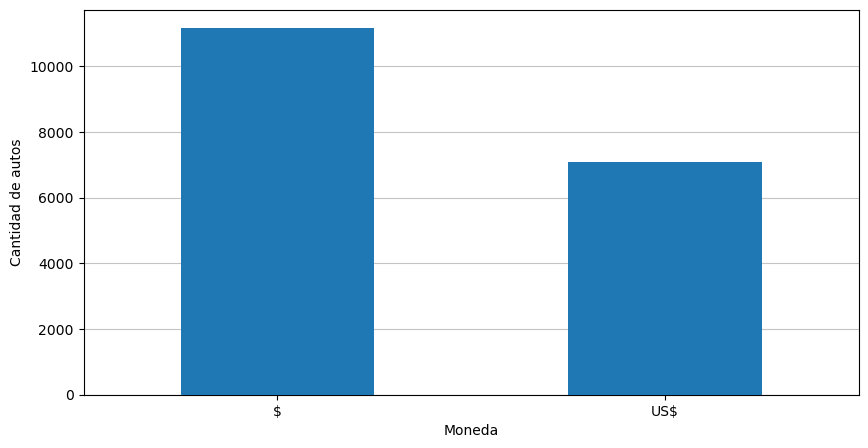

In [50]:
raw_data['Moneda'].value_counts().plot(kind='bar', figsize=(10, 5), zorder=10)
plt.xlabel('Moneda')
plt.ylabel('Cantidad de autos')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Cantidad de valores nulos

In [51]:
print("La columna \'Moneda\' tiene", raw_data['Moneda'].isna().sum(), "valores nulos.")

La columna 'Moneda' tiene 0 valores nulos.


### 17. Descripción

### 18. Tipo de vendedor

#### Distintos tipos de vendedor

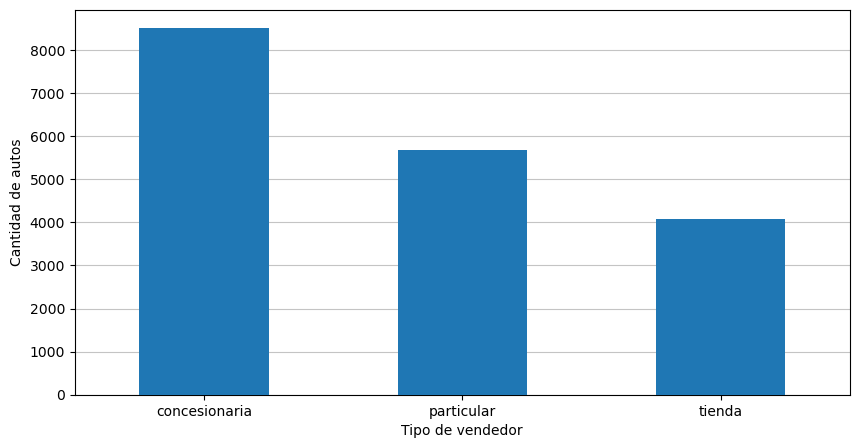

In [52]:
raw_data['Tipo de vendedor'].value_counts().plot(kind='bar', figsize=(10, 5), zorder=10)
plt.xlabel('Tipo de vendedor')
plt.ylabel('Cantidad de autos')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Cantidad de valores faltantes

In [53]:
print("La columna \'Tipo de vendedor\' tiene", raw_data['Tipo de vendedor'].isna().sum(), "valores nulos.")

La columna 'Tipo de vendedor' tiene 0 valores nulos.
